## 3.6 softmax回归的从零开始实现

In [1]:
import keras
import keras.backend as K
import keras.datasets.fashion_mnist
import numpy as np
import d2lzh as d2l

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

### 3.6.1 获取和读取数据

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

### 3.6.2 初始化模型参数
### 3.6.3 实现softmax运算
### 3.6.4 定义模型
### 3.6.5 定义损失函数
### 3.6.6 计算分类准确率

In [3]:
# y_true.shape = (?, 1) no one_hot
# K.argmax(y_pred, axis=-1).shape is (?) 
# So, y_true have to do K.flatten(y_true) to (?)
def metric_accuracy(y_true, y_pred):
    ytrue = K.flatten(y_true)
    ypred = K.cast(K.argmax(y_pred, axis=-1), K.floatx())
    acc = K.equal(ytrue, ypred)
    return K.mean(acc)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(
    10, use_bias=True,
    bias_initializer=keras.initializers.zeros(),
    kernel_initializer=keras.initializers.normal(stddev=0.01)))
model.add(keras.layers.Softmax())
model.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy, metric_accuracy])


W0928 20:01:48.157488 4680070592 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0928 20:01:48.171973 4680070592 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 20:01:48.181670 4680070592 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0928 20:01:48.205668 4680070592 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.tra

### 3.6.7 训练模型

In [5]:
model.fit(x_train, y_train, batch_size=256, epochs=5)

W0928 20:01:48.303676 4680070592 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0928 20:01:48.322484 4680070592 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 0s 8us/step - loss: 1.3663 - sparse_categorical_accuracy: 0.6524 - metric_accuracy: 0.6524
Epoch 2/5
60000/60000 [==============================] - 0s 6us/step - loss: 0.9164 - sparse_categorical_accuracy: 0.7182 - metric_accuracy: 0.7182
Epoch 3/5
60000/60000 [==============================] - 0s 7us/step - loss: 0.8026 - sparse_categorical_accuracy: 0.7511 - metric_accuracy: 0.7511
Epoch 4/5
60000/60000 [==============================] - 0s 7us/step - loss: 0.7423 - sparse_categorical_accuracy: 0.7681 - metric_accuracy: 0.7681
Epoch 5/5
60000/60000 [==============================] - 0s 7us/step - loss: 0.7028 - sparse_categorical_accuracy: 0.7796 - metric_accuracy: 0.7796


In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 17us/step


[0.7052216859817505, 0.7694, 0.7694]

### 3.6.8 预测

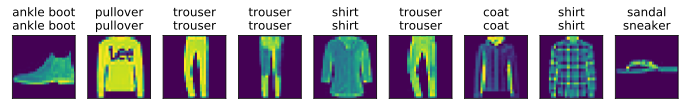

In [7]:
true_labels = d2l.get_fashion_mnist_labels(y_test[0:9])
pred_labels = d2l.get_fashion_mnist_labels(np.argmax(model.predict(x_test[0:9]), axis=-1))

titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(x_test[0:9], titles[0:9])